# opencv
## 제공하는 기능
- 이미지 형식 변환
- 크기 및 색상 변환
- 필터링, 얼굴 인식, 물체 인식, 문자 인식

In [4]:
# 맥에서 opencv (cv2)
!pip install opencv-python

     |████████████████████████████████| 52.3 MB 868 kB/s  eta 0:00:01     |██████████████████████████▎     | 43.0 MB 12.7 MB/s eta 0:00:01


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# 이미지 읽기
!curl https://raw.githubusercontent.com/StillWork/data/master/pool.jpg \
    -o pool.jpg
img = cv2.imread("pool.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 99 1587k   99 1582k    0     0  2114k      0 --:--:-- --:--:-- --:--:-- 2119k
100 1587k  100 1587k    0     0  2119k      0 --:--:-- --:--:-- --:--:-- 2125k


In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(3024, 4032, 3)

In [5]:
img.min(), img.max()

(0, 255)

## 이미지를 그림으로 출력하기

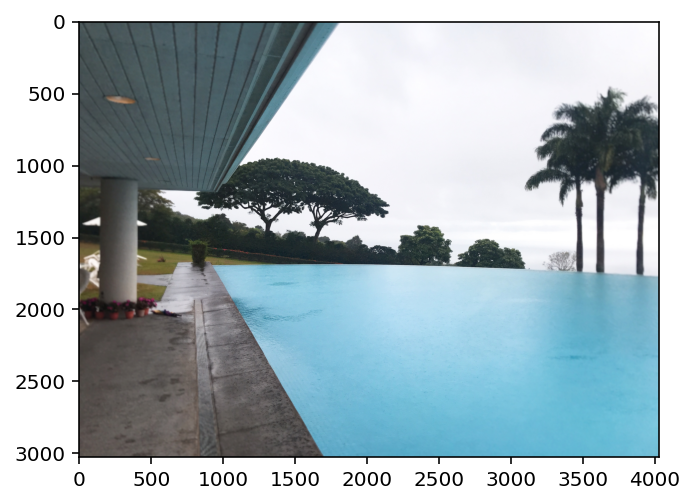

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  #COLOR_BGR2RGB: BGR-> RGB로 바꾸어주다
# plt.axis("off")
plt.show()

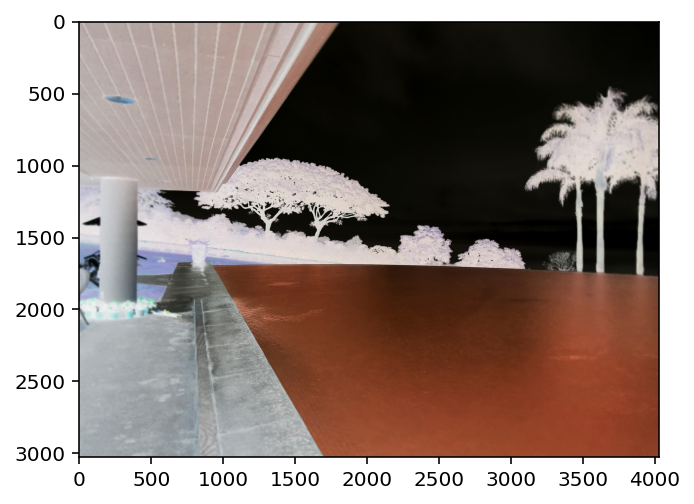

In [8]:
# 반전(네거티브) 처리
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

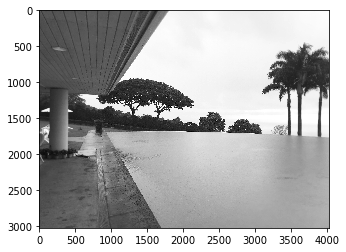

In [46]:
# 그레이로 변환
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

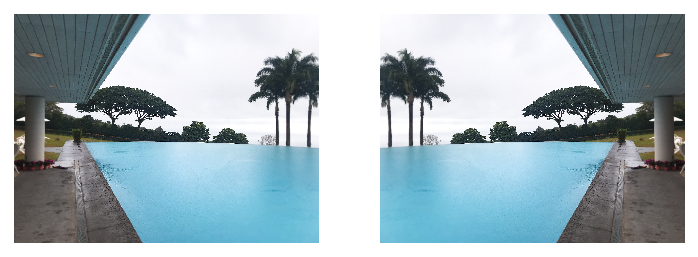

In [55]:
# 좌우 반전하기

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img2 = cv2.flip(img, 1)  #가로 방향으로 flip, 좌우가 반전
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## 저장하기

In [49]:
cv2.imwrite("pool_2.jpg", img)

True

## 크기 자르기

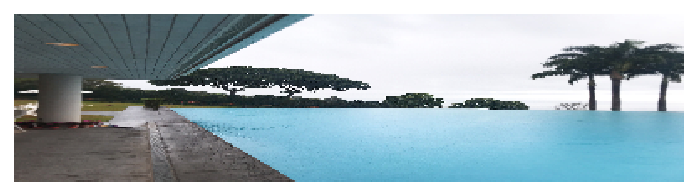

In [56]:
# 폭과 높이 조정
im2 = cv2.resize(img, (400, 100))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [52]:
img.shape

(3024, 4032, 3)

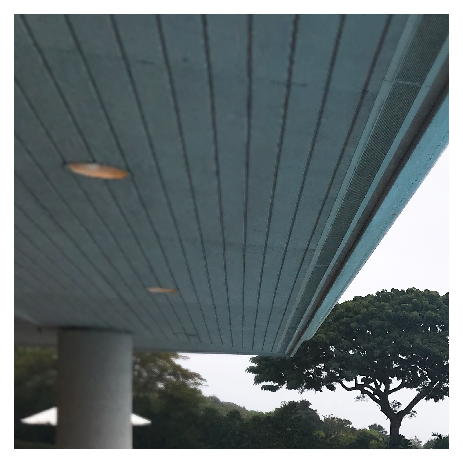

In [57]:
# 슬라이스
im2 = img[0:1500, 0:1500]
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# 얼굴을 검출하는 기능
- Haar-like 특징 학습기 사용한다. 눈, 코, 입 부분의 명암의 패턴을 인식
- 얼굴 특징 데이터베이스인 캐스케이드 파일 필요 (haarcascade 검색하면 됨
- https://github.com/opencv/opencv/tree/master/data/haarcascades


In [9]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \
    -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   170  100   170    0     0    253      0 --:--:-- --:--:-- --:--:--   253
100   170  100   170    0     0    252      0 --:--:-- --:--:-- --:--:--   253

100  660k  100  660k    0     0   530k      0  0:00:01  0:00:01 --:--:--  530k


In [10]:
!ls -al ha*

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [60]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1733k  100 1733k    0     0  1409k      0  0:00:01  0:00:01 --:--:-- 1409k


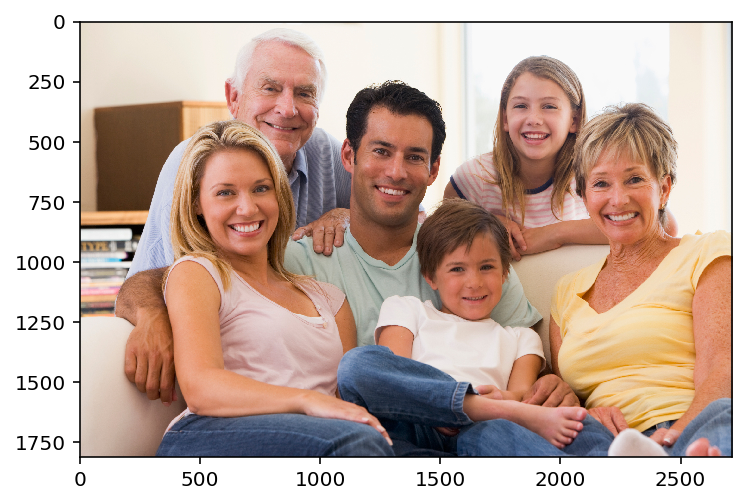

In [61]:
!curl https://raw.githubusercontent.com/StillWork/data/master/families.jpg\
    -o families.jpg
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

얼굴 인식 실패


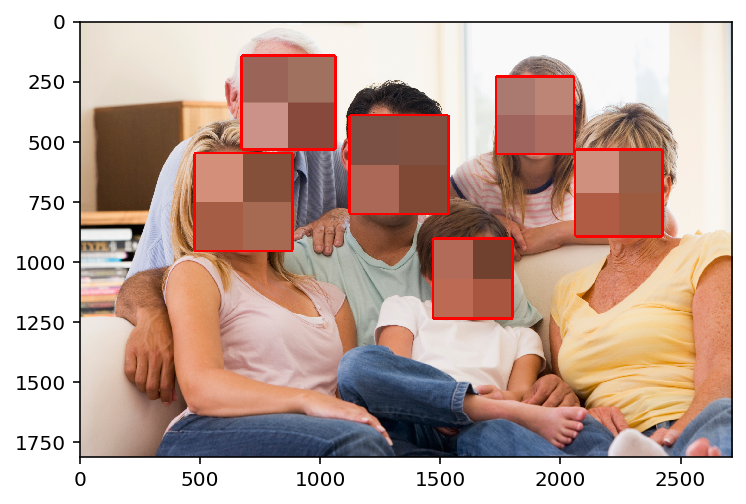

In [75]:
# 얼굴 인식하기
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) #흑백으로 전환  #minSize: 최소 얼굴  사이즈
# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)  #이미지 위에 사각형을 만들어라

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 그레이 이미지로 출력하기
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [1]:
def mosaic(img, rect, size):  #모자이크 처리
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [3]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
# cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'face_list' is not defined